# Tan_Tianhe_final_project.ipynb

# Tianhe_Tan "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# 1.0 Introduction 

## 1.1 Background
Movie is a big category now in entertainment industry and has a history of more than 100 years. There are so many factors in a movie can finally affect the quality of the movie and the performance on the market. Meanwhile, it is hard to find a universal way to measure if a movie is success. in this project, I will use IMDB SCORE as a scale to measure a movie's success.   

## 1.2 business understanding
### 1.2.a What are the project’s goals?

- The primary goal is to find out which factor is most important to a movie's success.
- The second goal is to predict a movie success.

### 1.2.b If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect? 

- movie title
- genre
- director name
- primary actor name
- Number of people who voted for the movie 
- Content rating of the movie 
- Budget of the movie
- imdb_score

### 1.2.c What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.

### The assumption of variables were highly correlated to imdb score.
- Number of people who voted for the movie
- Content rating of the movie
- Budget of the movie

# 2.0 Data understanding.

## 2.1 Import data

In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import numpy as np

#to view entire column
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
# import movie metadata 
df=pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2.2 data description.


<img src="images/das1.jpg">

# Essential Data Transformation

## 2.3 Identify data quality issues

In [4]:
#data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

**A total of 5043 movies in the dataset.**

**There are many missing values in the dataset**

## 2.4 Identify data types 

**Numerical columns**: 
- num_critic_for_reviews
- duration                     
- director_facebook_likes     
- actor_3_facebook_likes       
- actor_1_facebook_likes       
- gross                        
- num_voted_users            
- cast_total_facebook_likes    
- facenumber_in_poster         
- num_user_for_reviews       
- budget                      
- title_year                  
- actor_2_facebook_likes       
- imdb_score                   
- aspect_ratio                 
- movie_facebook_likes 

**Categorial columns**:
- color                        
- director_name                
- actor_2_name                 
- genres                      
- actor_1_name                 
- movie_title                  
- actor_3_name                 
- plot_keywords                
- movie_imdb_link              
- language                     
- country                      
- content_rating               


In [5]:
# how many missing values in each column or variable
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

## Many columns has missing values, I will try to drop all missing value and check if the sample size is way too smaller.

In [6]:
#remove the rows with any missing value
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [7]:
#Describe shows a quick statistic summary of the data
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## 2.5 Identify value counts of a selective list of columns considered to be important to predict a movie’s success (imdb_score) 

In [8]:
df1['color'].value_counts()

Color               3632
 Black and White    124 
Name: color, dtype: int64

In [9]:
df1['country'].value_counts().head()

USA        2987
UK         318 
France     101 
Germany    80  
Canada     59  
Name: country, dtype: int64

In [10]:
df1['director_name'].value_counts().head()

Steven Spielberg    25
Clint Eastwood      19
Woody Allen         19
Ridley Scott        17
Martin Scorsese     16
Name: director_name, dtype: int64

In [11]:
df1['duration'].value_counts().head()

101.0    113
100.0    104
98.0     103
95.0     95 
99.0     93 
Name: duration, dtype: int64

In [12]:
df1['genres'].value_counts().head()

Comedy|Drama|Romance    147
Drama                   141
Comedy|Drama            138
Comedy                  138
Comedy|Romance          131
Name: genres, dtype: int64

In [13]:
df1['budget'].value_counts().head()

20000000.0    157
30000000.0    134
15000000.0    132
40000000.0    130
25000000.0    126
Name: budget, dtype: int64

In [14]:
df1['imdb_score'].value_counts().head()

6.7    176
6.6    162
6.5    154
6.4    146
6.8    143
Name: imdb_score, dtype: int64

In [15]:
df1['content_rating'].value_counts()

R            1700
PG-13        1308
PG           566 
G            87  
Not Rated    34  
Unrated      22  
Approved     17  
X            10  
NC-17        6   
Passed       3   
M            2   
GP           1   
Name: content_rating, dtype: int64

# 3.0 Data preparation

### There are many unnecessary columns in the dataset that did not have much relationship with movie scores, so this dataset need a series of cleaning.

### 3.1 dorp unnecessary columns.
- There are only 124 Black and White movies out of 3726 movies, so "Color" is not a critical factor to a movie's success
- 95% of movies in dataset are using 2.35 or 1.85 aspect_ratio, so "aspect_ratio" is not a critical factor.
- Movie "IMDB" links has nothing to do with the scores of movies. 
- Around 96% of movies are in English, so "language" is not a critical factor.

In [16]:
# remove multiple columns
df1 = df1.drop(['color','aspect_ratio','movie_imdb_link', 'language'], axis=1)
df1.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


###  3.2 replace other country except the USA and the UK to "other". 

In [17]:
df1.country.iloc[[(df1['country'] != 'USA') & (df1['country'] != 'UK')]] = 'OTHER'
df1.head()

C:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:920: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


### 3.3.a : creat a new dataframe associate splited genres with imdb_Scores.

In [18]:
g = df1[['genres','imdb_score']]
# check your new data frame
g.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
5,Action|Adventure|Sci-Fi,6.6


In [19]:
len(g)

3756

In [20]:
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


### 3.3.b Another approach: Creat new dataframe that split Genres.

In [21]:
df2 = df1.join(df1.pop('genres').str.get_dummies('|'))
df2.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# 4.0 Business intelligence: Data visualization 

### 4.1 movie imdb score and movie year.

In [22]:
# find the relationship of imdb score and movie year.
df1.groupby(['imdb_score',"title_year"]).size().unstack().head()

title_year,1927.0,1929.0,1933.0,1935.0,1936.0,1937.0,1939.0,1940.0,1946.0,1947.0,1948.0,1950.0,1952.0,1953.0,1954.0,1957.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
imdb_score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


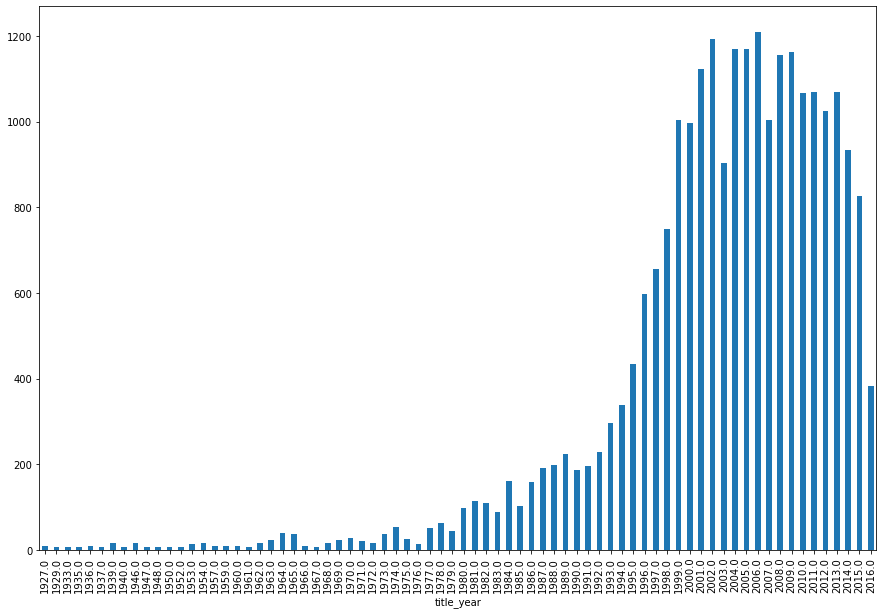

In [23]:
# find which year or a period of time has the highest total  imdb score. 
df1.groupby('title_year')['imdb_score'].sum().plot.bar(figsize=(15,10))

### 4.2  movie imdb score and director.

In [24]:
# top 10 directors total added up imdb scores.
df1.groupby('director_name')['imdb_score'].sum().sort_values(ascending=False).head(10)

director_name
Steven Spielberg     188.6
Clint Eastwood       136.9
Woody Allen          133.0
Martin Scorsese      122.8
Ridley Scott         120.2
Tim Burton           110.9
Steven Soderbergh    107.3
Spike Lee            101.0
Robert Zemeckis      95.0 
Ron Howard           90.1 
Name: imdb_score, dtype: float64

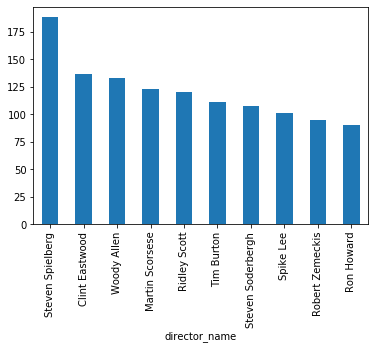

In [25]:
# plot
# Steven Spielberg is the director with the highest imdb scores.
df1.groupby('director_name')['imdb_score'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

### 4.3  movie imdb score and duration.

In [26]:
# Top 20 movie duration time that has the highest total imdb_score.
df1.groupby('duration')['imdb_score'].sum().sort_values(ascending=False).head(20)

duration
101.0    716.7
98.0     650.0
100.0    636.2
106.0    594.2
107.0    582.2
110.0    564.7
95.0     564.1
99.0     564.0
90.0     555.8
97.0     553.0
104.0    545.6
109.0    526.2
96.0     518.4
102.0    514.1
94.0     503.4
103.0    495.8
108.0    492.8
91.0     482.1
105.0    481.6
112.0    469.5
Name: imdb_score, dtype: float64

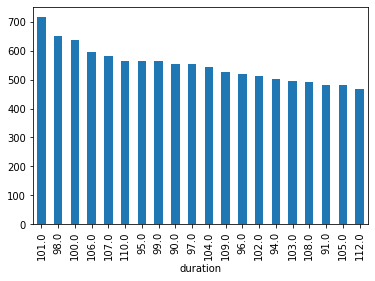

In [27]:
# plot
# movie which has a range of 90 to 115 minutes of duration time has the highest oppotunity to get a high imdb_score.
df1.groupby('duration')['imdb_score'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

### 4.4 movie imdb score and genres.

In [28]:
# find out what types of genre has the highest imdb_score.
b.groupby('genres')['imdb_score'].sum().sort_values(ascending=False)

genres
Drama          12851.9
Comedy         9040.4 
Thriller       7123.1 
Action         6031.9 
Romance        5530.5 
Adventure      5037.3 
Crime          4640.5 
Fantasy        3182.7 
Sci-Fi         3138.2 
Family         2746.4 
Mystery        2486.0 
Horror         2322.4 
Biography      1710.7 
Animation      1313.7 
War            1072.6 
History        1066.1 
Sport          975.8  
Music          957.9  
Musical        633.3  
Western        400.8  
Documentary    314.5  
Film-Noir      7.7    
Name: imdb_score, dtype: float64

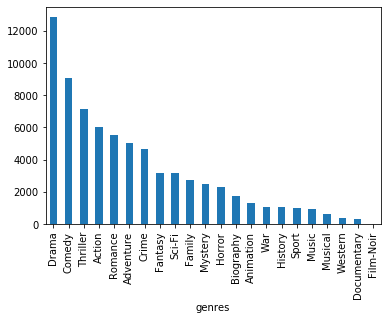

In [29]:
# plot
# Drama movie in general has the highest imdb_score in all genres
b.groupby('genres')['imdb_score'].sum().sort_values(ascending=False).plot(kind='bar')

### 4.5 movie imdb score and content_rating.

In [30]:
# pivot table for countries and imdb_score in different content_rating
df1.pivot_table(index=['country'], columns='content_rating', values='imdb_score',aggfunc='sum')

content_rating,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
country,,,,,,,,,,,,
OTHER,8.9,60.1,NaN,NaN,4.6,119.9,274.5,788.3,NaN,1703.6,53.7,6.9
UK,51.2,58.1,6.7,6.8,7.3,22.2,391.4,617.5,NaN,1004.2,15.1,NaN
USA,66.9,447.5,NaN,8.1,26.3,94.8,2898.8,6797.0,21.4,8579.3,84.0,58.5


In [31]:
# find the relationship of imdb score and content_rating.
df1.groupby('content_rating')['imdb_score'].sum().sort_values(ascending=False)

content_rating
R            11287.1
PG-13        8202.8 
PG           3564.7 
G            565.7  
Not Rated    236.9  
Unrated      152.8  
Approved     127.0  
X            65.4   
NC-17        38.2   
Passed       21.4   
M            14.9   
GP           6.7    
Name: imdb_score, dtype: float64

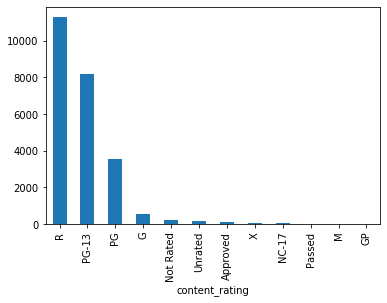

In [32]:
# plot
# Movie rated "R" has the highest total imdb_score.
df1.groupby('content_rating')['imdb_score'].sum().sort_values(ascending=False).plot(kind='bar')

In [33]:
# Top 20 budget level of movies in the dataset.
df1.groupby('budget').size().sort_values(ascending=False).head(20)

budget
20000000.0     157
30000000.0     134
15000000.0     132
40000000.0     130
25000000.0     126
35000000.0     117
10000000.0     105
50000000.0     100
60000000.0     90 
12000000.0     76 
5000000.0      74 
8000000.0      64 
45000000.0     61 
6000000.0      59 
18000000.0     58 
80000000.0     55 
70000000.0     54 
55000000.0     54 
13000000.0     51 
100000000.0    49 
dtype: int64

In [34]:
# Total imdb_score of movies in different budget level.
df1.groupby('budget')['imdb_score'].sum().sort_values(ascending=False).head(20)

budget
20000000.0     959.7
30000000.0     866.3
15000000.0     856.5
40000000.0     816.3
25000000.0     801.3
35000000.0     727.3
10000000.0     660.6
50000000.0     627.8
60000000.0     556.2
12000000.0     491.9
5000000.0      464.9
8000000.0      420.6
6000000.0      399.7
45000000.0     383.9
18000000.0     382.6
55000000.0     352.6
80000000.0     343.5
70000000.0     337.5
13000000.0     326.7
100000000.0    318.2
Name: imdb_score, dtype: float64

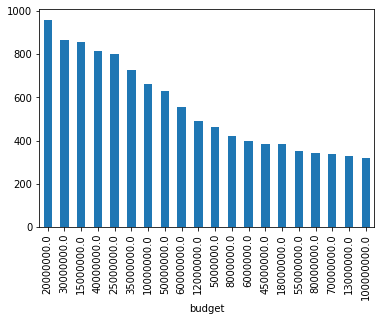

In [35]:
# plot
# Movie which has a range of 15 to 40 million dollars of budget has the highest oppotunity to get a high imdb_score.
df1.groupby('budget')['imdb_score'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

### 4.5 movie imdb score and the Gross earnings of the movie in Dollars.

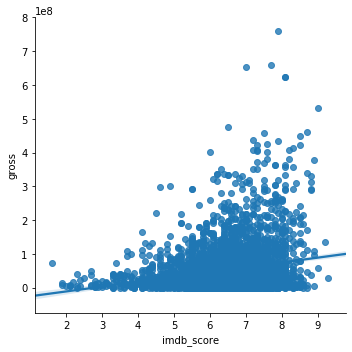

In [36]:
#plot
sns.lmplot('imdb_score', 'gross', data=df1, fit_reg=True)

### 4.6 movie imdb score and the Gross earnings of the movie in Dollars.

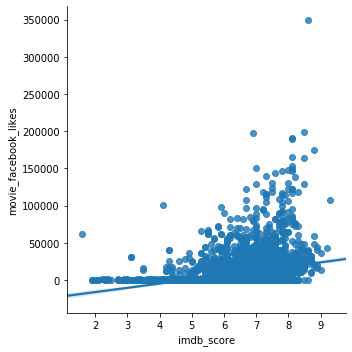

In [37]:
sns.lmplot('imdb_score', 'movie_facebook_likes', data=df1, fit_reg=True)

### 4.7 country which produced the most movies in the dataset. 

In [38]:
# total numvers of movies by produced country. 
df1.groupby('country').size()

country
OTHER    451 
UK       318 
USA      2987
dtype: int64

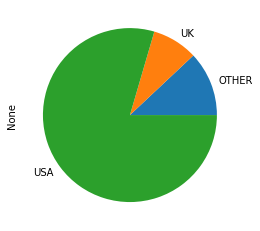

In [39]:
# plot
# USA produced the most of movies in the dataset. 
df1.groupby('country').size().plot(kind='pie')

# 4.x. some further apporach.

## 4.x.1 from 4.2 we noticed that the Steven Spielberg has the highest total imdb_scores. This is a small analysis of Steven Spielberg.

In [40]:
## ALl Steven Spielberg
ss= df.loc[df['director_name']=='Steven Spielberg'] 
ss.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
54,Color,Steven Spielberg,470.0,122.0,14000.0,1000.0,Ray Winstone,11000.0,317011114.0,Action|Adventure|Fantasy,Harrison Ford,Indiana Jones and the Kingdom of the Crystal Skull,333847,14959,Jim Broadbent,2.0,cult figure|femme fatale|indiana jones|unsubtitled foreign language|year 1957,http://www.imdb.com/title/tt0367882/?ref_=fn_tt_tt_1,2054.0,English,USA,PG-13,185000000.0,2008.0,1000.0,6.2,2.35,5000
178,Color,Steven Spielberg,252.0,117.0,14000.0,358.0,Penelope Wilton,535.0,52792307.0,Adventure|Family|Fantasy,Mark Rylance,The BFG,12572,1950,Rafe Spall,0.0,cannibal|evil brother|giant|london england|queen,http://www.imdb.com/title/tt3691740/?ref_=fn_tt_tt_1,106.0,English,UK,PG,140000000.0,2016.0,400.0,6.8,2.35,27000


In [41]:
# Schindler's List is the best of Steven Spielberg's movie and has a 8.9 imdb_score.
ss.groupby('movie_title')['imdb_score'].sum().sort_values(ascending=False).head()

movie_title
Schindler's List                       8.9
Saving Private Ryan                    8.6
Raiders of the Lost Ark                8.5
Indiana Jones and the Last Crusade     8.3
Jurassic Park                          8.1
Name: imdb_score, dtype: float64

##  4.x.2 from 4.4 we noticed that the "Drama" movie has the highest total imdb_scores. This is a small analysis of drama movie.

In [42]:
# ALl drama movie
da= df.loc[df['genres']=='Drama'] 
da.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
607,Color,Oliver Stone,297.0,136.0,0.0,17.0,Austin Pendleton,903.0,52474616.0,Drama,Frank Langella,Wall Street: Money Never Sleeps,84118,1579,John Buffalo Mailer,2.0,corporate greed|crisis|economy|greed|mentor,http://www.imdb.com/title/tt1027718/?ref_=fn_tt_tt_1,245.0,English,USA,PG-13,70000000.0,2010.0,592.0,6.3,2.35,13000
669,Color,Mike Newell,141.0,117.0,179.0,403.0,Kirsten Dunst,8000.0,63695760.0,Drama,Julia Roberts,Mona Lisa Smile,61490,12850,Marian Seldes,1.0,art|college|school|student|wellesley college,http://www.imdb.com/title/tt0304415/?ref_=fn_tt_tt_1,264.0,English,USA,PG-13,65000000.0,2003.0,4000.0,6.4,1.85,0
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37023395.0,Drama,Brad Pitt,Fight Club,1347461,13209,Eugenie Bondurant,2.0,anti establishment|dark humor|fighting|multiple personality disorder|surprise ending,http://www.imdb.com/title/tt0137523/?ref_=fn_tt_tt_1,2968.0,English,USA,R,63000000.0,1999.0,783.0,8.8,2.35,48000
751,Color,Steven Zaillian,110.0,115.0,234.0,521.0,Kathleen Quinlan,3000.0,56702901.0,Drama,Robert Duvall,A Civil Action,23302,4713,Sydney Pollack,1.0,1980s|law firm|lawsuit|lawyer|toxic waste,http://www.imdb.com/title/tt0120633/?ref_=fn_tt_tt_1,181.0,English,USA,PG-13,60000000.0,1998.0,552.0,6.5,2.35,1000
1147,Color,Gus Van Sant,137.0,136.0,835.0,225.0,Rob Brown,670.0,51768623.0,Drama,F. Murray Abraham,Finding Forrester,73006,1801,Michael Nouri,1.0,basketball|mentor|new york|school|writing,http://www.imdb.com/title/tt0181536/?ref_=fn_tt_tt_1,297.0,English,USA,PG-13,43000000.0,2000.0,370.0,7.3,2.35,0


In [43]:
#best drama movie
da.groupby('movie_title')['imdb_score'].value_counts().sort_values(ascending=False).head()

movie_title           imdb_score
Dekalog               9.1           2
Hamlet                7.8           2
Precious              7.3           2
You Can Count on Me   7.7           1
Guiana 1838           7.4           1
Name: imdb_score, dtype: int64

In [44]:
#Paul Thomas Anderson directed the most "Drama" movies and has the highest imdb_score.
da.groupby('director_name')['imdb_score'].sum().sort_values(ascending=False).head()

director_name
Paul Thomas Anderson     31.1
Gus Van Sant             29.3
Alejandro G. Iñárritu    22.7
Thomas Vinterberg        16.4
Spike Lee                15.6
Name: imdb_score, dtype: float64

## 4.x.3 from 4.5 we noticed that the "R" rated movie has the highest total imdb_scores. This is a small analysis of "R" rated movie.

In [45]:
# All movies rated "R"
MR = df.loc[df['content_rating']=='R'] 
MR.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,1982,Bipasha Basu,3.0,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_tt_tt_1,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
94,Color,Jonathan Mostow,280.0,109.0,84.0,191.0,M.C. Gainey,648.0,150350192.0,Action|Sci-Fi,Nick Stahl,Terminator 3: Rise of the Machines,305340,1769,Carolyn Hennesy,0.0,drifter|exploding truck|future|machine|skynet,http://www.imdb.com/title/tt0181852/?ref_=fn_tt_tt_1,1676.0,English,USA,R,200000000.0,2003.0,284.0,6.4,2.35,0
113,Color,Oliver Stone,248.0,206.0,0.0,591.0,Angelina Jolie Pitt,12000.0,34293771.0,Action|Adventure|Biography|Drama|History|Romance|War,Anthony Hopkins,Alexander,138863,24598,Brian Blessed,3.0,ancient greece|conquest|greek|greek myth|king,http://www.imdb.com/title/tt0346491/?ref_=fn_tt_tt_1,1390.0,English,Germany,R,155000000.0,2004.0,11000.0,5.5,2.35,0
124,Color,Lana Wachowski,245.0,129.0,0.0,233.0,Collin Chou,309.0,139259759.0,Action|Sci-Fi,Essie Davis,The Matrix Revolutions,364948,1062,Nona Gaye,0.0,battle|epic|fight|future|machine,http://www.imdb.com/title/tt0242653/?ref_=fn_tt_tt_1,2121.0,English,Australia,R,150000000.0,2003.0,269.0,6.7,2.35,0
126,Color,Lana Wachowski,275.0,138.0,0.0,30.0,Daniel Bernhardt,234.0,281492479.0,Action|Sci-Fi,Steve Bastoni,The Matrix Reloaded,421818,534,Helmut Bakaitis,0.0,car motorcycle chase|one against many|oracle|prophecy|stylized violence,http://www.imdb.com/title/tt0234215/?ref_=fn_tt_tt_1,2789.0,English,USA,R,150000000.0,2003.0,198.0,7.2,2.35,0


In [46]:
# Best "R" movie
MR.groupby('movie_title')['imdb_score'].value_counts().sort_values(ascending=False).head()

movie_title         imdb_score
Halloween           7.9           3
Murder by Numbers   6.1           2
Snakes on a Plane   5.6           2
Halloween II        4.9           2
Cat People          6.1           2
Name: imdb_score, dtype: int64

In [47]:
# Clint Eastwood directed the most "R" movies and has the highest imdb_score.
MR.groupby('director_name')['imdb_score'].sum().sort_values(ascending=False).head()

director_name
Clint Eastwood       102.7
Martin Scorsese      101.9
Spike Lee            86.4 
Ridley Scott         79.7 
Steven Soderbergh    79.6 
Name: imdb_score, dtype: float64

## 4.x.4 Best (highest imdb scores) 10 movies in the dataset

In [48]:
#sort values by movies imdb score.
df1.sort_values('imdb_score', ascending=False).head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1937,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|prison|prison cell search|wrongful imprisonment,4144.0,USA,R,25000000.0,1994.0,745.0,9.3,108000
3466,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|rise to power,2238.0,USA,R,6000000.0,1972.0,10000.0,9.2,43000
66,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star died before release|urban setting,4667.0,USA,PG-13,185000000.0,2008.0,13000.0,9.0,37000
2837,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|melancholy|revenge,650.0,USA,R,13000000.0,1974.0,14000.0,9.0,14000
339,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,battle|epic|king|orc|ring,3189.0,USA,PG-13,94000000.0,2003.0,857.0,8.9,16000
4498,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti western,780.0,OTHER,Approved,1200000.0,1966.0,34.0,8.9,20000
1874,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96067179.0,Liam Neeson,Schindler's List,865020,15233,Caroline Goodall,0.0,german|german soldier|jew|jewish|nazi,1273.0,USA,R,22000000.0,1993.0,795.0,8.9,41000
3355,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,1.0,black comedy|cunnilingus|neo noir|nonlinear timeline|postmodern,2195.0,USA,R,8000000.0,1994.0,902.0,8.9,45000
836,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329691196.0,Tom Hanks,Forrest Gump,1251222,15700,Sam Anderson,0.0,amputee|love|vietnam|vietnam war|war hero,1398.0,USA,PG-13,55000000.0,1994.0,294.0,8.8,59000
270,Peter Jackson,297.0,171.0,0.0,857.0,Orlando Bloom,16000.0,313837577.0,Christopher Lee,The Lord of the Rings: The Fellowship of the Ring,1238746,22342,Billy Boyd,2.0,elf|hobbit|middle earth|quest|ring,5060.0,OTHER,PG-13,93000000.0,2001.0,5000.0,8.8,21000


# 5.0 Correlation analysis.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
df1.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.370465


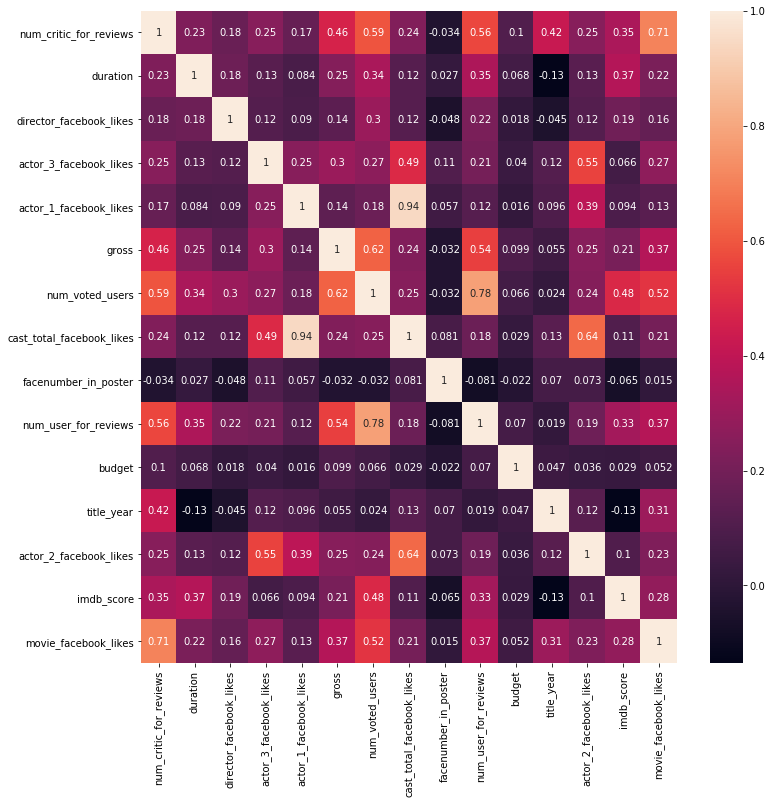

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True)

## analysis:
- imdb_score has positive relationship with most factors except facenumber_in_poster and title_year, which stands for that the lower number of faces on the poster the higher imdb_score. And the earlier the year, the higer the imdb score.
- Num_voted_users is relatively high correlated to the imdb score. The more people voted the movie, the higher imdb score.
- The budget has a lower than I expect correlation to the scores. There is farely small positive correlation between budget and imdb scores.
- actor_1_facebook_likes is highly correlated with cast_total_facebook_likes, which indicate that the leading actor of a movie is really important to the whole cast.
- num_critic_for_reviews and movie_facebook_likes are highly correlated. The more facebook likes, the higher chance for people to give a critical review.

# 6.0 Regression.

## 6.1) Model Development: scikit (predictive analytics)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
num_user_for_reviews         3756 non-null float64
country                      3756 non-null object
content_rating               3756 non

In [53]:
# Model building
y = df1['imdb_score']
X = df1[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','movie_facebook_likes']]

#### y  as 'imdb_score' . X as all other numerical values. 

In [54]:
y.head()

0    7.9
1    7.1
2    6.8
3    8.5
5    6.6
Name: imdb_score, dtype: float64

In [55]:
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000


In [56]:
# build a multiple regression model 
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [57]:
# coefficients and y-intercepts of all factors
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.65150709e-03  1.03214393e-02  3.07166134e-06  6.91732966e-05
  6.99253090e-05 -1.94433701e-09  3.72450932e-06 -6.87844661e-05
 -2.39160135e-02 -6.32095227e-04 -4.47001038e-11 -2.27872647e-02
  7.24583031e-05 -2.10839742e-06]
y-intercept  50.55014659020218


In [58]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,num_critic_for_reviews,2.651507e-03
1,duration,1.032144e-02
2,director_facebook_likes,3.071661e-06
3,actor_3_facebook_likes,6.917330e-05
4,actor_1_facebook_likes,6.992531e-05
5,gross,-1.944337e-09
6,num_voted_users,3.724509e-06
7,cast_total_facebook_likes,-6.878447e-05
8,facenumber_in_poster,-2.391601e-02
9,num_user_for_reviews,-6.320952e-04


In [59]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.024'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.023'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [60]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.709216065753178
variance or r-squared:  0.3641371778961834


### The MSE of the model 1 is 0.70922. and the R-sqrd is  0.36414
### The facenumber_in_poster has the highest negative coef. means with one unit increase in 'facenumber_in_poster', 0.024 unit will decrease in 'imdb_score'
### The duration has the highest positive coef. means with one unit increase in 'duration', 0.0103 unit will increase in 'imdb_score'

### model 2. 

In [61]:
y = df1['imdb_score']
X = df1[['num_critic_for_reviews','duration','num_voted_users','facenumber_in_poster','num_user_for_reviews','title_year']]
#model2 


model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [62]:
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [ 2.24538598e-03  9.94851672e-03  3.15266597e-06 -2.71911760e-02
 -6.45609648e-04 -2.34635491e-02]
y-intercept  51.910771301871094


In [63]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))

,0,1
0,num_critic_for_reviews,0.002245
1,duration,0.009949
2,num_voted_users,0.000003
3,facenumber_in_poster,-0.027191
4,num_user_for_reviews,-0.000646
5,title_year,-0.023464


In [64]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7364303539850001
variance or r-squared:  0.3397376261202997


### The MSE of the model 2 is 0.73643. and the R-sqrd is 0.33973. Model 2 has a higher MSE and a lower R-sqrd value, which is not what we expected.

## 6.2) Multiple Regression using Statsmodels

In [65]:
# Statsmodels
runs_reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+budget+title_year+actor_2_facebook_likes+movie_facebook_likes",df1)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:21:17   Log-Likelihood:                -4684.3
No. Observations:                3756   AIC:                             9399.
Df Residuals:                    3741   BIC:                             9492.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [66]:
runs_reg.mse_resid

0.7120597548700713

In [67]:
runs_reg.params

Intercept                    5.055015e+01
num_critic_for_reviews       2.651507e-03
duration                     1.032144e-02
director_facebook_likes      3.071661e-06
actor_3_facebook_likes       6.917330e-05
actor_1_facebook_likes       6.992531e-05
gross                       -1.944337e-09
num_voted_users              3.724509e-06
cast_total_facebook_likes   -6.878447e-05
facenumber_in_poster        -2.391601e-02
num_user_for_reviews        -6.320952e-04
budget                      -4.470010e-11
title_year                  -2.278726e-02
actor_2_facebook_likes       7.245830e-05
movie_facebook_likes        -2.108397e-06
dtype: float64

### MSE value of statmodel is slightly higher than multiple regression model.
### R-sqrd value is same as multiple regression model

## 6.3) advanced regression techniques

## 6.3a) Regression model based on regularization


In [68]:

model1 =lm.Lasso(alpha=1.0)          
model1.fit(X, y)
model1_y = model1.predict(X)

In [69]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.42795261e-03  8.49417010e-03  3.36848318e-06 -0.00000000e+00
 -5.30754597e-04 -9.94364227e-03]
y-intercept  25.028911799282778


In [70]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.008'),
 ('num_voted_users', '0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('title_year', '-0.010')]

In [71]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7558113381997896
variance or r-squared:  0.3223611904851621


### The MSE is still really high and the R-squared value is still low in regulation model.

## 6.3b) Regression model based on Feature selection

In [72]:

X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [7.70000e+01, 7.26390e+04],
       [8.10000e+01, 5.20550e+04],
       [9.00000e+01, 4.28500e+03]])

In [73]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 2]


In [74]:
X.head(2)

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,title_year
0,723.0,178.0,886204,0.0,3054.0,2009.0
1,302.0,169.0,471220,0.0,1238.0,2007.0


In [75]:

model1 = lm.LinearRegression()
model1.fit(X_new, y)
model1_y = model1.predict(X_new)

print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.804129664671588
variance or r-squared:  0.2790403621603512


### Feature selection regression model is the worst model now. Which has the highest MSE and the Lowest R-sqrd. 

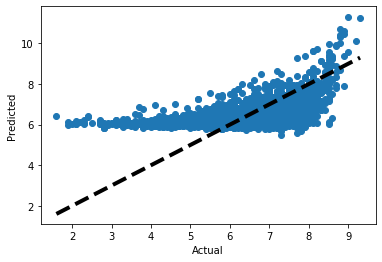

In [76]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## 6.3c) RandomForestRegressor

In [77]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df1['imdb_score']
X = df1[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','movie_facebook_likes']]


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06660661182108633
variance or r-squared:  0.9403431464132632


In [78]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.017620464050740945, 'facenumber_in_poster'),
 (0.023360704301858302, 'actor_1_facebook_likes'),
 (0.028408023506047157, 'movie_facebook_likes'),
 (0.02881217140234732, 'actor_2_facebook_likes'),
 (0.030163658393855895, 'cast_total_facebook_likes'),
 (0.03474161752654095, 'director_facebook_likes'),
 (0.03638201709853396, 'actor_3_facebook_likes'),
 (0.04130238759101362, 'title_year'),
 (0.04844872379387477, 'num_critic_for_reviews'),
 (0.07126739127581118, 'gross'),
 (0.0746153752253224, 'num_user_for_reviews'),
 (0.11658885427184519, 'budget'),
 (0.11694743973007199, 'duration'),
 (0.3313411718321365, 'num_voted_users')]

### RandomForestRegressor is the best model since it has a super low MSE and a super high R-sqrd.

# 7.0) Classification.

In [79]:
# Check what version of sklearn is running in your machine.
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# run the latest sklearn

The scikit-learn version is 0.21.2.


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
num_user_for_reviews         3756 non-null float64
country                      3756 non-null object
content_rating               3756 non

In [82]:
# Drop object values. 
dfn = df1.drop(['director_name','actor_2_name','actor_1_name','plot_keywords', 'movie_title','actor_3_name','country','content_rating'], axis=1)
dfn.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000


In [83]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 15 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
movie_facebook_likes         3756 non-null int64
dtypes: float64(12), int64(3)
memory usage: 629.5 KB


In [84]:
dfc = dfn
# setting bins
dfc['imdb_label'] = pd.cut(df1['imdb_score'], bins=[0, 4, 6, 8,10], labels=['0-3.99', '4-5.99', '6-7.99', '8-10'],
                   include_lowest=True)

dfc.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,imdb_label
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,6-7.99
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,6-7.99
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,6-7.99
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,8-10
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,6-7.99


In [85]:
dfcc = dfc.drop(['imdb_score'], axis=1)
dfcc.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,imdb_label
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,6-7.99
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,6-7.99
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000,6-7.99
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000,8-10
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000,6-7.99


## 7.1) decisiontree

In [86]:

y = dfcc['imdb_label']
X = dfcc.drop(['imdb_label'], axis=1)
print(y.shape, X.shape)

(3756,) (3756, 14)


In [87]:
# split validation
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()
    
# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")


0.6858917480035492
--------------------------------------------------------
[[  3  18  11   0]
 [ 14 166 129   0]
 [  7 135 569  23]
 [  0   0  17  35]]
--------------------------------------------------------
              precision    recall  f1-score   support

      0-3.99       0.12      0.09      0.11        32
      4-5.99       0.52      0.54      0.53       309
      6-7.99       0.78      0.78      0.78       734
        8-10       0.60      0.67      0.64        52

    accuracy                           0.69      1127
   macro avg       0.51      0.52      0.51      1127
weighted avg       0.68      0.69      0.68      1127

--------------------------------------------------------


In [89]:

!pip install scikit-plot 

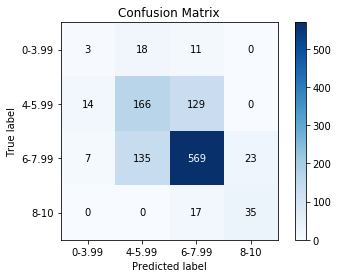

In [90]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

#### The decision tree model is 68.3% accurate. Therefore, in a real-world situation, we expect that the model will be about 68% accurate when the model is applied.

In [91]:
!pip install pydotplus

In [99]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

True

open the pdf file from File Explorer.

In [115]:
from IPython.display import IFrame
IFrame('data/dt.pdf', width=1000, height=1000)

#if pdf is not displayed below (using Google Chrome),use Firefox or just open the pdf file from File Explorer.

## 7.2) KNN

In [102]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.3, random_state= 42)
knn = KNeighborsClassifier()
knn=knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:

print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.5989352262644189
--------------------------------------------------------
[[  0   5  29   0]
 [  2  90 211   0]
 [  2 156 582   6]
 [  0   5  36   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

      0-3.99       0.00      0.00      0.00        34
      4-5.99       0.35      0.30      0.32       303
      6-7.99       0.68      0.78      0.73       746
        8-10       0.33      0.07      0.11        44

    accuracy                           0.60      1127
   macro avg       0.34      0.29      0.29      1127
weighted avg       0.56      0.60      0.57      1127

--------------------------------------------------------


#### The KNN model is 59.89% accurate. Therefore, we expect that the model will be about **60% accurate** when the model is applied into a real-world situation

## 7.3) Logistic regression

In [106]:
dfn.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.370465


In [107]:
corr = pd.DataFrame(dfn.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.482430
duration,0.366221
num_critic_for_reviews,0.347886
num_user_for_reviews,0.325003
movie_facebook_likes,0.281155
gross,0.214740
director_facebook_likes,0.192314
cast_total_facebook_likes,0.106803
actor_2_facebook_likes,0.102372
actor_1_facebook_likes,0.093597


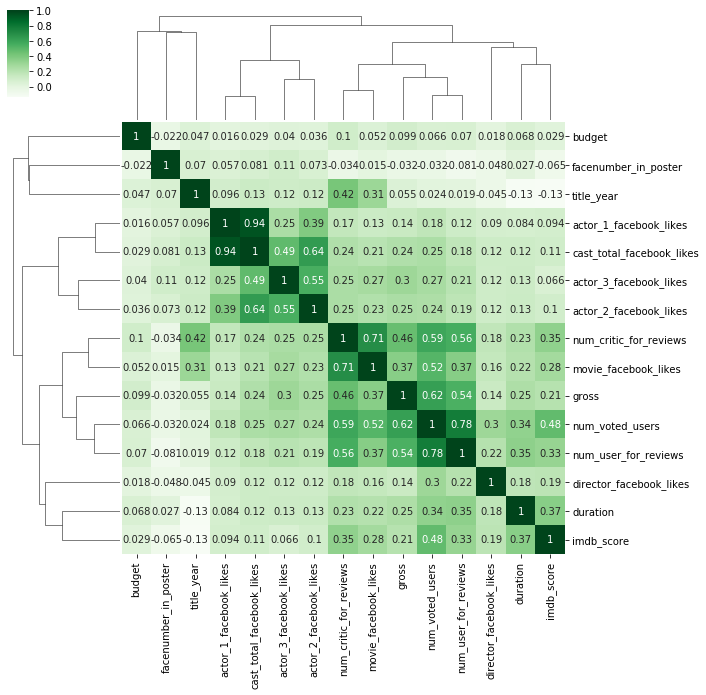

In [108]:
sns.clustermap(data=dfn.corr(), annot=True, cmap='Greens')

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))


0.6663708961845608
[[  0   2  30   0]
 [  0  15 294   0]
 [  0   5 717  12]
 [  0   0  33  19]]
              precision    recall  f1-score   support

      0-3.99       0.00      0.00      0.00        32
      4-5.99       0.68      0.05      0.09       309
      6-7.99       0.67      0.98      0.79       734
        8-10       0.61      0.37      0.46        52

    accuracy                           0.67      1127
   macro avg       0.49      0.35      0.34      1127
weighted avg       0.65      0.67      0.56      1127



C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The Logistic regression  model is 66.64% accurate. Therefore, we expect that the model will be about **67% accurate** when the model is applied into a real-world situation

## 7.3) Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7613132209405501

In [113]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7613132209405501
[[  2  20  10   0]
 [  0 171 138   0]
 [  0  70 660   4]
 [  0   0  27  25]]
              precision    recall  f1-score   support

      0-3.99       1.00      0.06      0.12        32
      4-5.99       0.66      0.55      0.60       309
      6-7.99       0.79      0.90      0.84       734
        8-10       0.86      0.48      0.62        52

    accuracy                           0.76      1127
   macro avg       0.83      0.50      0.54      1127
weighted avg       0.76      0.76      0.74      1127



#### The Random Forest Classifier model is 76.13% accurate. Therefore, we expect that the model will be about **76% accurate** when the model is applied into a real-world situation

# 8.0 clustering analysis.

In [121]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [150]:
dfcu = df1.drop(['director_name','actor_2_name','actor_1_name','plot_keywords', 'movie_title','actor_3_name','country','content_rating'], axis=1)
dfcu.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000


In [151]:
dfcu.var()

num_critic_for_reviews       1.524041e+04
duration                     5.128738e+02
director_facebook_likes      9.413677e+06
actor_3_facebook_likes       3.588183e+06
actor_1_facebook_likes       2.408499e+08
gross                        4.944602e+15
num_voted_users              2.311476e+10
cast_total_facebook_likes    3.656576e+08
facenumber_in_poster         4.167888e+00
num_user_for_reviews         1.691079e+05
budget                       5.108065e+16
title_year                   9.777468e+01
actor_2_facebook_likes       2.065619e+07
imdb_score                   1.115657e+00
movie_facebook_likes         4.606556e+08
dtype: float64

In [166]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [167]:
k_means.fit(dfcu)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [168]:
k_means.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [169]:
k_means.cluster_centers_

array([[2.89111111e+02, 1.22452675e+02, 1.69854527e+03, 1.83612551e+03,
        1.19890967e+04, 1.92405486e+08, 2.93494383e+05, 1.98956255e+04,
        1.24691358e+00, 7.67798354e+02, 1.20542817e+08, 2.00505761e+03,
        4.18370370e+03, 6.92777778e+00, 2.59000658e+04],
       [3.63000000e+02, 1.10000000e+02, 5.84000000e+02, 7.40000000e+01,
        6.29000000e+02, 2.20141200e+06, 6.88830000e+04, 1.17300000e+03,
        0.00000000e+00, 2.79000000e+02, 1.22155000e+10, 2.00600000e+03,
        3.98000000e+02, 7.00000000e+00, 7.00000000e+03],
       [1.49233691e+02, 1.08430015e+02, 6.73860949e+02, 6.13663400e+02,
        7.13157458e+03, 3.18834255e+07, 7.79429296e+04, 1.02973136e+04,
        1.39846861e+00, 2.72872588e+02, 2.80670071e+07, 2.00266616e+03,
        1.70254119e+03, 6.39497703e+00, 6.89800031e+03],
       [1.38500000e+02, 1.20750000e+02, 1.53075000e+03, 2.21000000e+02,
        5.26750000e+02, 7.79033500e+05, 7.35975000e+04, 1.15475000e+03,
        2.50000000e-01, 2.06250000e+0

In [170]:
dfu = pd.DataFrame(k_means.labels_, columns = ['cluster'])
dfu.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [171]:
dfco = dfcu.join(dfu)
dfco.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,0.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,0.0


In [172]:
dfco.groupby('cluster').count()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0.0,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.0,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753,2753
3.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [173]:
dfco.groupby('cluster').size()

cluster
0.0    455 
1.0    1   
2.0    2753
3.0    4   
dtype: int64

### 455 observations are in cluster 0 
### 1 observations are in cluster 1 
### 2753 observations are in cluster 2
### 4 observations are in cluster 3 


In [174]:
dfco.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0.0,267.101099,120.885714,1461.641758,1615.397802,11606.428571,1.255953e+08,211832.017582,18767.140659,1.279121,643.641758,1.080651e+08,2006.659341,3910.771429,6.597143,21714.958242
1.0,45.000000,114.000000,73.000000,563.000000,695.000000,1.510000e+07,22797.000000,3444.000000,1.000000,96.000000,1.500000e+07,1984.000000,654.000000,6.000000,0.000000
2.0,158.730839,110.372321,792.362877,721.993462,7761.228841,4.810844e+07,98879.335997,11419.417000,1.449691,309.064293,4.176921e+07,2002.976026,1965.909553,6.404541,8106.859063
3.0,68.000000,109.500000,27.250000,157.000000,8595.250000,1.516978e+07,11431.250000,9533.750000,1.500000,124.000000,1.665000e+07,2001.500000,550.750000,5.625000,439.500000


## What is the profile of each cluster?

### cluster 0: high num_critic_for_reviews, high director_facebook_likes, high actor_3_facebook_likes, high actor_1_facebook_likes, high gross, high num_voted_users, high cast_total_facebook_likes, high num_user_for_reviews, high budget, newer title_year, high actor_2_facebook_likes, high imdb_score and high movie_facebook_likes.

### cluster 1: low num_critic_for_reviews, low director_facebook_likes, low actor_3_facebook_likes,low actor_1_facebook_likes, low gross, low num_voted_users, low cast_total_facebook_likes, low num_user_for_reviews, low budget, older title_year, low actor_2_facebook_likes, low imdb_score and low movie_facebook_likes.

### cluster 2: high num_critic_for_reviews, high director_facebook_likes, high actor_3_facebook_likes, high actor_1_facebook_likes, high gross, high num_voted_users, high cast_total_facebook_likes, high num_user_for_reviews, high budget, newer title_year, high actor_2_facebook_likes, high imdb_score and movie_facebook_likes.

### cluster 3: low num_critic_for_reviews, low director_facebook_likes, low actor_3_facebook_likes,low actor_1_facebook_likes, low gross, low num_voted_users, low cast_total_facebook_likes, low num_user_for_reviews, low budget, older title_year, low actor_2_facebook_likes, low imdb_score and low movie_facebook_likes.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [184]:
dfco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
movie_facebook_likes         3756 non-null int64
cluster                      3213 non-null float64
dtypes: float64(13), int64(3)
memory usage: 658.8 KB


In [186]:
dfco = dfco.dropna()
dfco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3754
Data columns (total 16 columns):
num_critic_for_reviews       3213 non-null float64
duration                     3213 non-null float64
director_facebook_likes      3213 non-null float64
actor_3_facebook_likes       3213 non-null float64
actor_1_facebook_likes       3213 non-null float64
gross                        3213 non-null float64
num_voted_users              3213 non-null int64
cast_total_facebook_likes    3213 non-null int64
facenumber_in_poster         3213 non-null float64
num_user_for_reviews         3213 non-null float64
budget                       3213 non-null float64
title_year                   3213 non-null float64
actor_2_facebook_likes       3213 non-null float64
imdb_score                   3213 non-null float64
movie_facebook_likes         3213 non-null int64
cluster                      3213 non-null float64
dtypes: float64(13), int64(3)
memory usage: 426.7 KB


In [187]:
X = (dfco - dfco.mean()) / (dfco.max() - dfco.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,cluster
0,0.677030,0.232066,-0.038520,0.000315,-0.011413,0.922380,0.456692,-0.011605,-0.033150,0.533805,0.015217,0.061911,-0.009512,0.190816,0.065840,-0.57257
1,0.157917,0.200487,-0.014042,0.006619,0.049524,0.329220,0.211028,0.054657,-0.033150,0.174486,0.020374,0.039439,0.020152,0.086920,-0.028716,-0.57257
2,0.527831,0.126803,-0.038520,-0.029859,0.004212,0.185461,0.095384,-0.001150,-0.009894,0.126207,0.015872,0.129327,-0.013476,0.047959,0.214837,-0.57257
3,0.788004,0.182943,0.918002,0.963141,0.029212,0.511634,0.609502,0.143597,-0.033150,0.463960,0.016281,0.095619,0.151539,0.268738,0.441198,-0.57257
5,0.355205,0.070662,-0.017868,-0.013816,-0.011976,0.018446,0.057696,-0.016113,-0.009894,0.075554,0.017403,0.095619,-0.011731,0.021985,0.040052,-0.57257


In [188]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 3, 3, 1], dtype=int64)

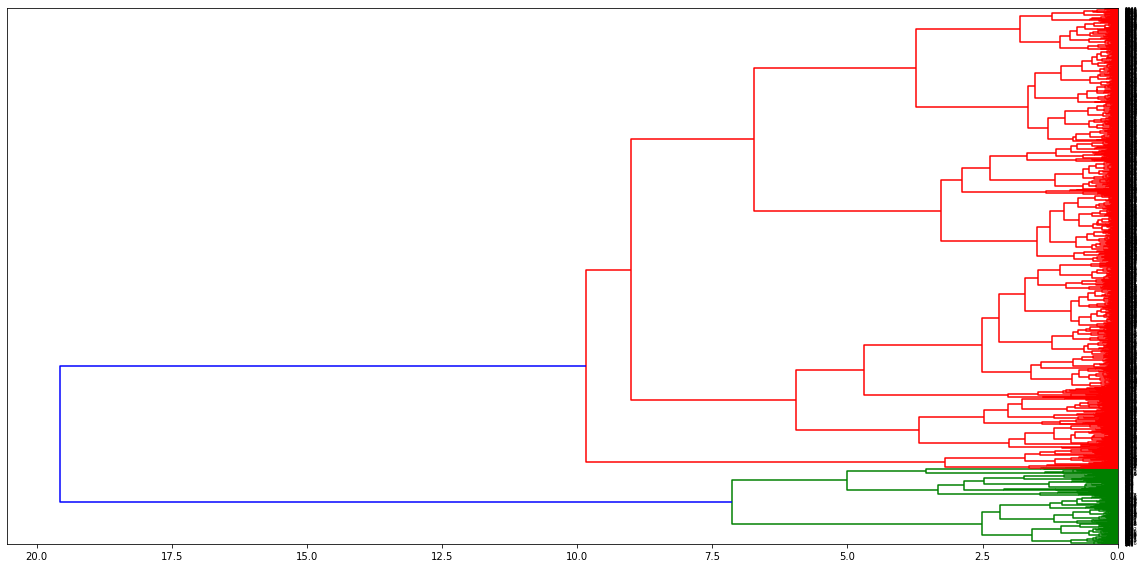

In [189]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

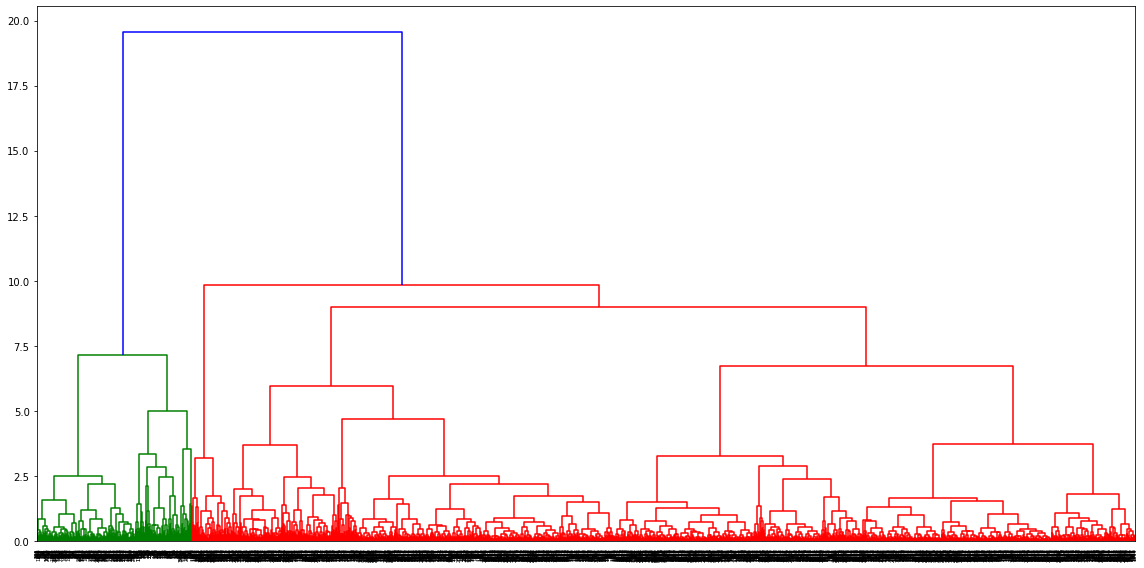

In [190]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

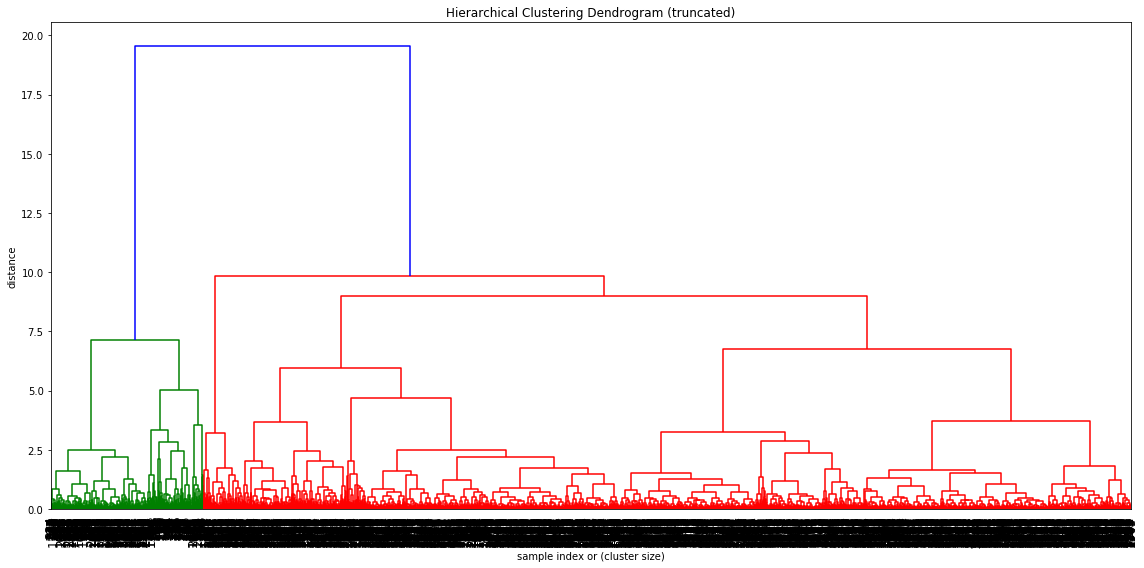

In [191]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

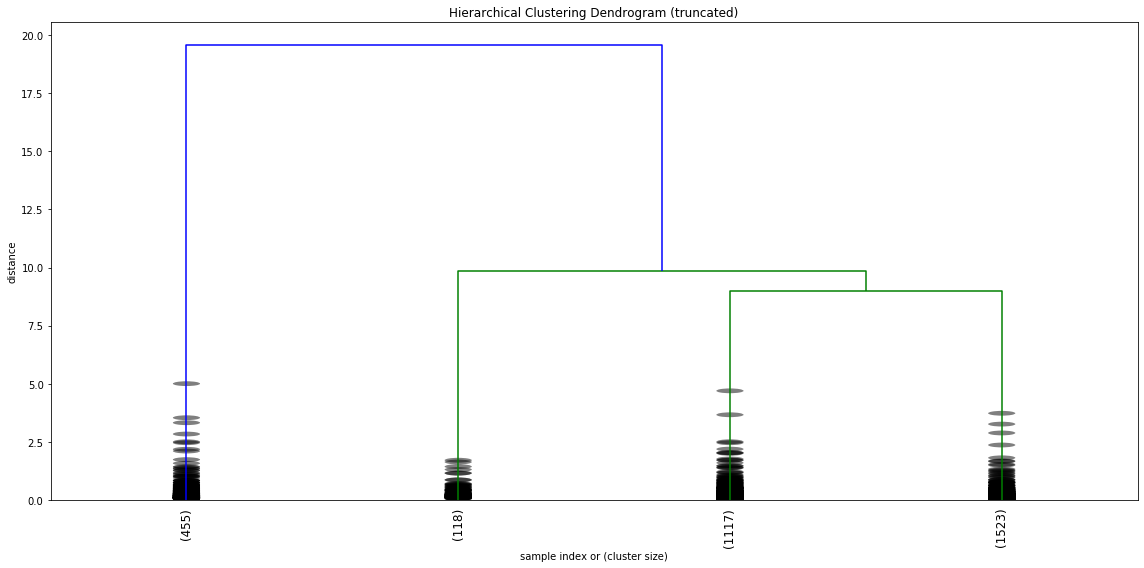

In [192]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

# 9.0 Storytelling: To predict if a movie will success in the future, there are some important factors that can actually affect the imdb scores of a movie. In this analysis, at some point, I added up imdb scores for a certain type of movie or director instead of analysis seperately.

## 9.1) USA has the best movie industry in the world, around 80% movies in the dataset are produced in the USA. If a movie is produced in the US, it more likely to have a good basic quality.

## 9.2) Secondly, director is another key factor of a movie. If the movie is direct by famous directors or experienced directors. It definitly will have a better overall quality.

## 9.3) Movie duration is also an important factor of a successful movie. If you want your movie has a high imdb score, you probably don't want a super long or super short movie. the best range in minutes of a successful movie is 95 to 115 minutes. 

## 9.4) Budget is not necessary has correlation with a movie's imdb score. Movie which has a range of 15 to 40 million dollars are the top five level of total imdb scores.

## 9.5) top 5 movie genres are Drama, Comedy, Thriller, Action and Romance  and top 2 rateings are rate "R" and "PG-13". If you want to produce a successful movie, the better choices are drama or comedy movie with a "R" or "PG-13" rating. 

## 9.6) Steven Spielberg is the director who has highest total imdb score and "The Shawshank Redemption" is the movie has the highest imdb score in the dataset. 

## 9.8) The scikit regression model has the MSE of 0.70922 of the model 1. and the R-sqrd is 0.36414. Which is not very ideal. It predict the facenumber_in_poster has the highest negative coef. means with one unit increase in 'facenumber_in_poster', 0.024 unit will decrease in 'imdb_score'. On the other hand ,the duration has the highest positive coef. means with one unit increase in 'duration', 0.0103 unit will increase in 'imdb_score'.

## 9.9) The RandomForestRegressor is the best model since it has a super low MSE of 0.0666 and a super high R-sqrd which is 0.94.

## 9.10) The Random Forest Classifier is also the best classifier model in terms of accuracy. Which is 76.13% when the model is applied into a real-world situation. The classification model shows the number of voted users is the most important factor that will affect on the movie imdb score. 

## 9.11) The clustering analysis put all movies that has a imdb score into 4 categories. The profile of each cluster are in two big categories. the first and third profile had movies that  high num_critic_for_reviews, high director_facebook_likes, high actor_3_facebook_likes, high actor_1_facebook_likes, high gross, high num_voted_users, high cast_total_facebook_likes, high num_user_for_reviews, high budget, newer title_year, high actor_2_facebook_likes, high imdb_score and high movie_facebook_likes. 

## The second and fourth profile had movies that cluster 3: low num_critic_for_reviews, low director_facebook_likes, low actor_3_facebook_likes,low actor_1_facebook_likes, low gross, low num_voted_users, low cast_total_facebook_likes, low num_user_for_reviews, low budget, older title_year, low actor_2_facebook_likes, low imdb_score and low movie_facebook_likes.


## 9.12) The third cluster has the highest number of movies which is 2753 movies.

## 9.13) Conclusion: For a better chance to be a successful movie, it will be USA made, around 100 minutes long, leading by famous director and famous leading actor, with a movie budget from 20 to 40 million dollars, a "R" or "PG-13" rating drama movie.

In [1]:
!pip install RISE

References
- Predict Movie Rating https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/
- Project Report: IMDB 5000 Movie Dataset http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html
